In [130]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
df_census=pd.read_csv("/Users/ashokraj/Desktop/adult.csv")
df_census.columns
len(df_census)

32561

-------------------------------------------------------------------


### Cleaning the data 
<p> 1)Check for duplicates.
<p> 2)Replace NULLs/missing data with appropriate values

In [131]:
df_census.duplicated().sum()


24

In [67]:
df_census_no_duplicates = df_census.drop_duplicates(keep = 'first')

In [132]:
df_census_final = df_census_no_duplicates.replace('?', 'Unknown')
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
 
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
le = LabelEncoder()
#for col in categorical_cols:
#    df_census_final[col] = le.fit_transform(df_census_final[col])

# Encode the target variable (income)
df_census_final['income_encoded'] = le.fit_transform(df_census_final['income'])

In [133]:
df_census_final.describe()
df_census_final.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_encoded
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0


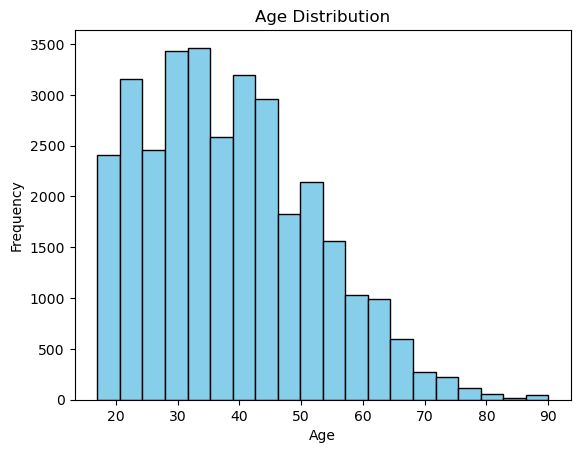

In [57]:
 
plt.hist(df_census_final['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


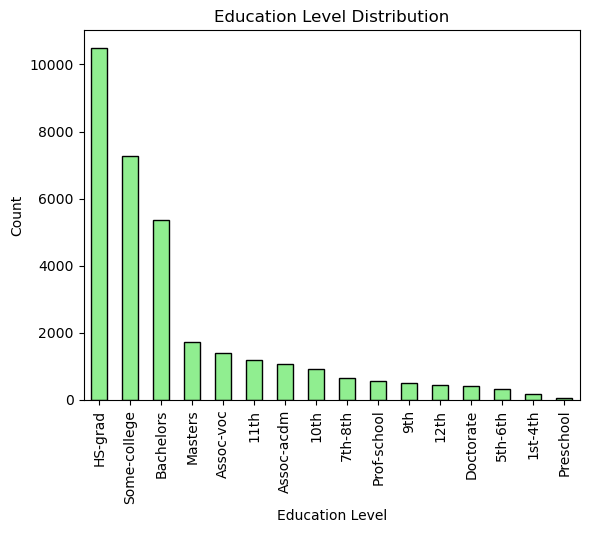

In [24]:
# Education level distribution
education_counts = df_census_final['education'].value_counts()
education_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

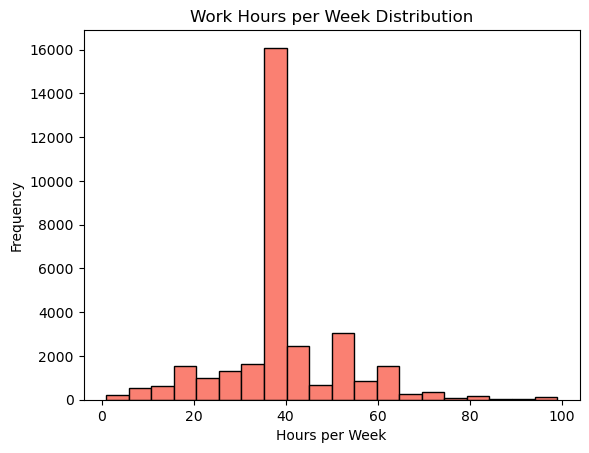

In [25]:
plt.hist(df_census_final['hours.per.week'], bins=20, color='salmon', edgecolor='black')
plt.title('Work Hours per Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()

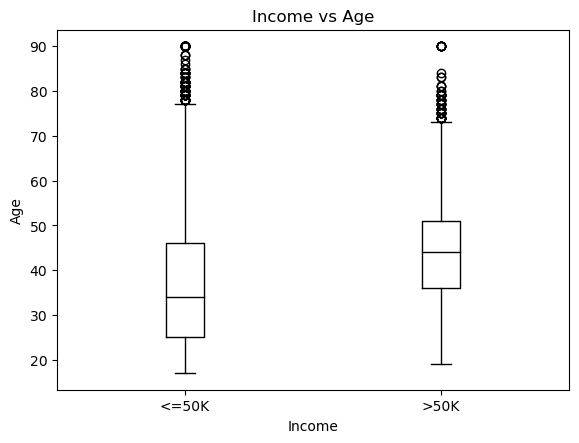

In [26]:
df_census_final.boxplot(column='age', by='income', grid=False, color='black')
plt.title('Income vs Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.suptitle('')  
plt.show()

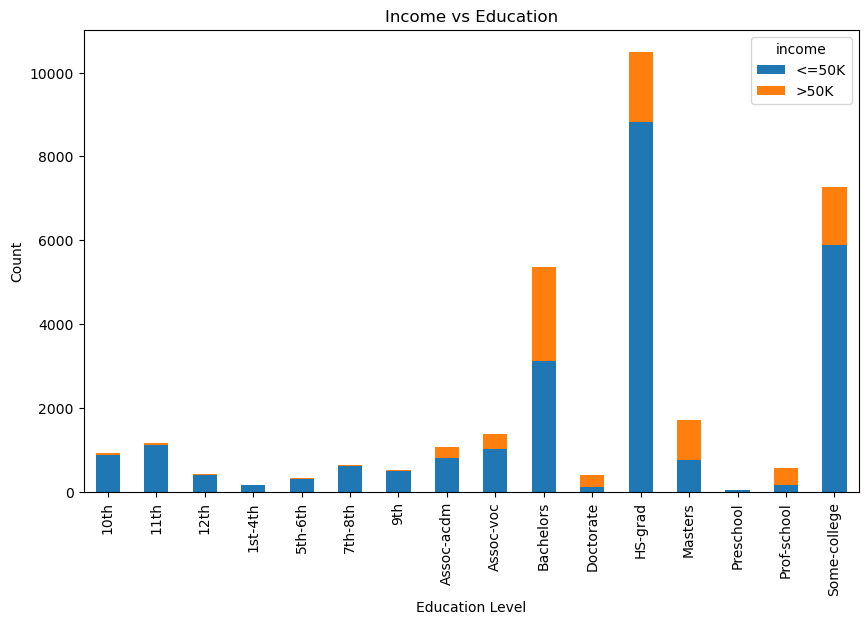

In [27]:
# Group by education and income
education_income = df_census_final.groupby(['education', 'income']).size().unstack()
education_income.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Income vs Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

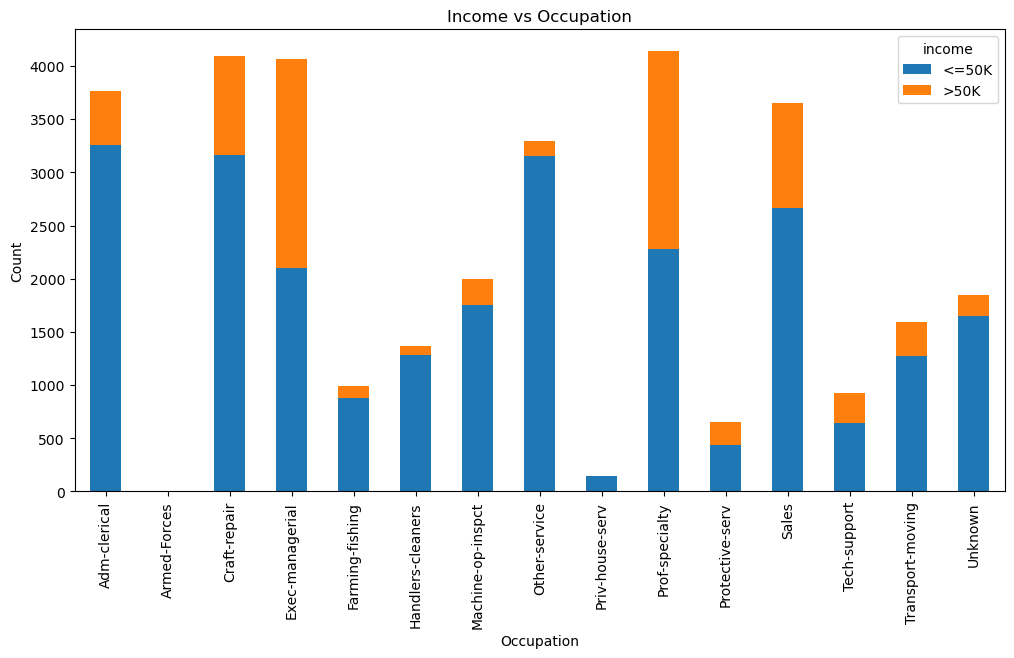

In [28]:
occupation_income = df_census_final.groupby(['occupation', 'income']).size().unstack()
occupation_income.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Income vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

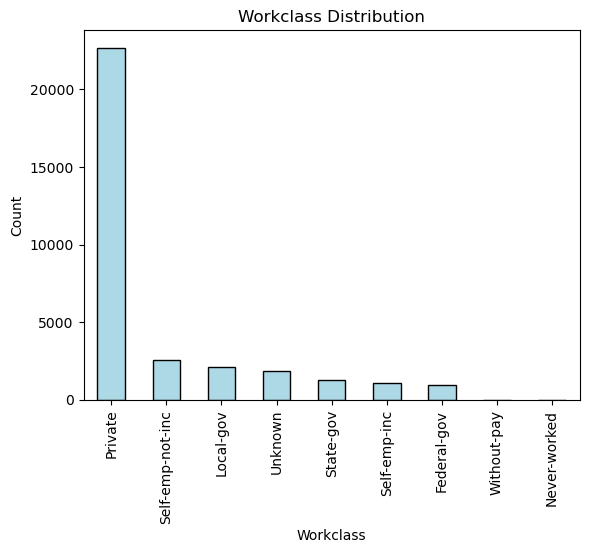

In [29]:
df_census_final['workclass'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Workclass Distribution')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()

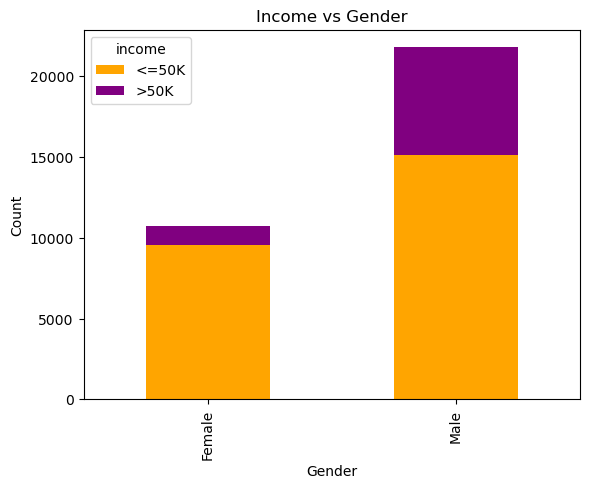

In [31]:
gender_income = df_census_final.groupby(['sex', 'income']).size().unstack()
gender_income.plot(kind='bar', stacked=True, color=['orange', 'purple'])
plt.title('Income vs Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

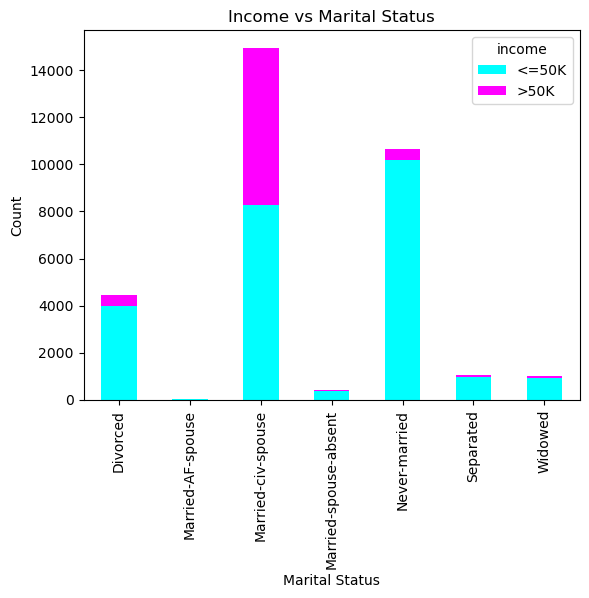

In [35]:
marital_income = df_census_final.groupby(['marital.status', 'income']).size().unstack()
marital_income.plot(kind='bar', stacked=True, color=['cyan', 'magenta'])
plt.title('Income vs Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

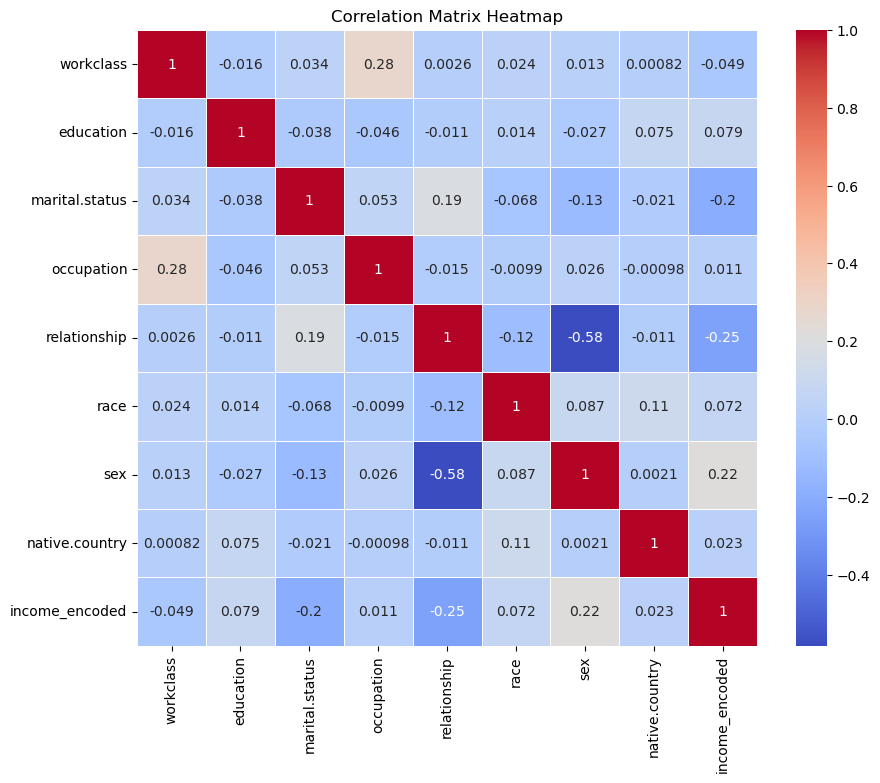

In [121]:
columns=categorical_cols
columns.append('income_encoded')
correlation_matrix = df_census_final[columns].corr()

 
plt.figure(figsize=(10,8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()

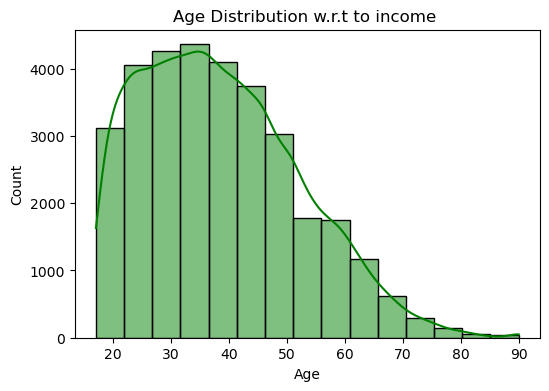

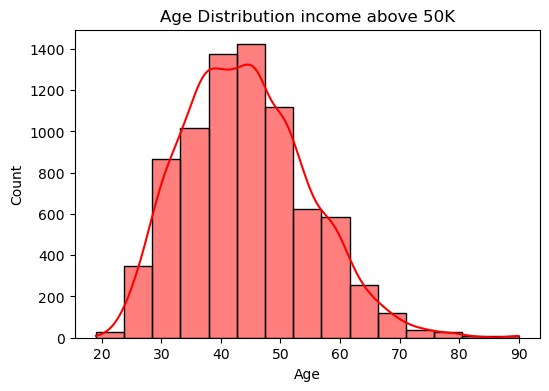

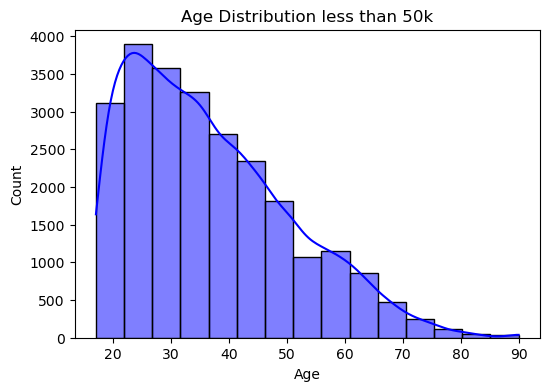

In [83]:
df_above_50k = df_census_final[df_census_final['income'] == '>50K']
df_less_50k = df_census_final[df_census_final['income'] != '>50K']

plt.figure(figsize=(6, 4))
sns.histplot(df_census_final['age'], bins=15, kde=True, color='green')
plt.title('Age Distribution w.r.t to income ')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
 
plt.figure(figsize=(6, 4))
sns.histplot(df_above_50k['age'], bins=15, kde=True, color='red')
plt.title('Age Distribution income above 50K')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df_less_50k['age'], bins=15, kde=True, color='blue')
plt.title('Age Distribution less than 50k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()




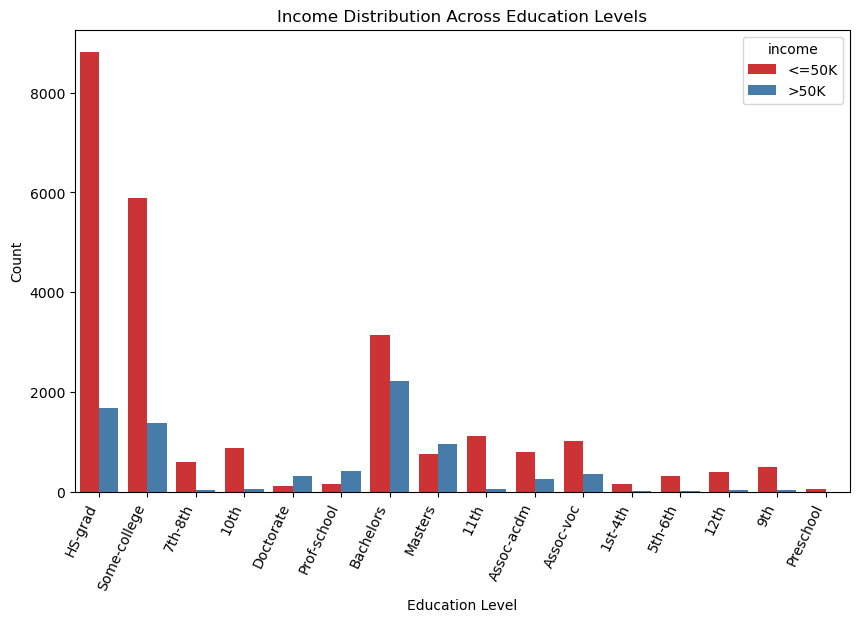

In [125]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_census_final, x='education', hue='income', palette='Set1')

plt.title('Income Distribution Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=65, ha='right')   

plt.show()

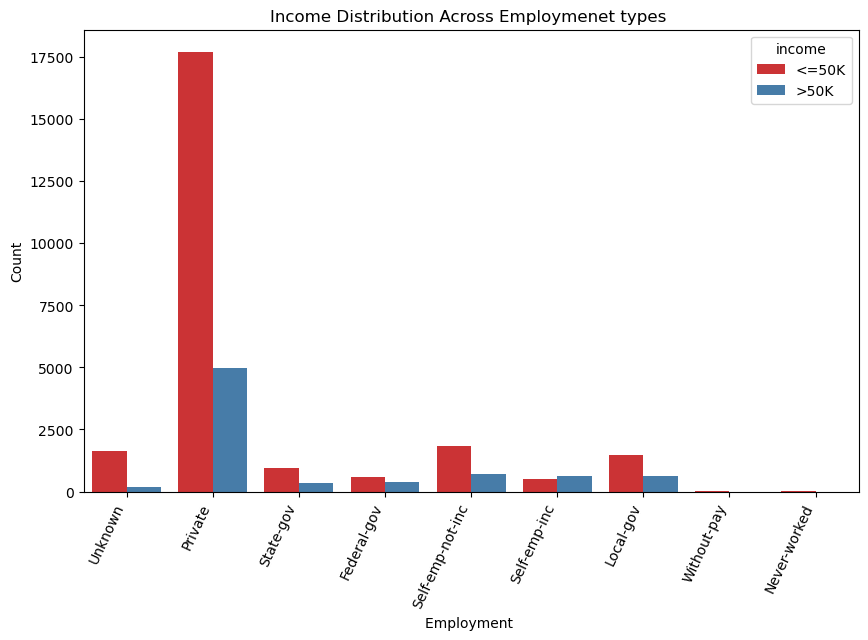

In [126]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_census_final, x='workclass', hue='income', palette='Set1')
plt.title('Income Distribution Across Employmenet types ')
plt.xlabel('Employment ')
plt.ylabel('Count')
plt.xticks(rotation=65, ha='right')   
plt.show()


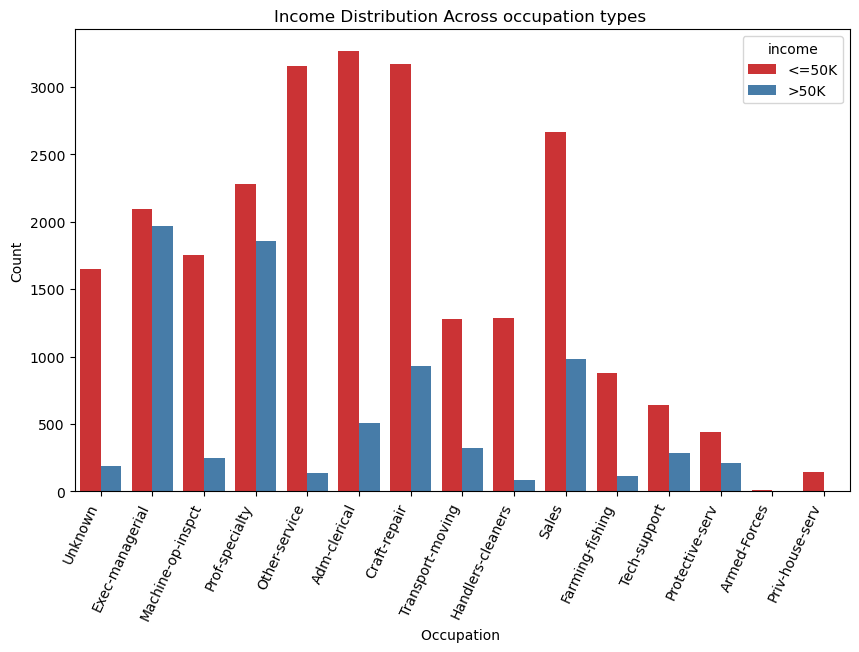

In [127]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df_census_final, x='occupation', hue='income', palette='Set1')
plt.title('Income Distribution Across occupation types ')
plt.xlabel('Occupation ')
plt.ylabel('Count')
plt.xticks(rotation=65, ha='right')   
plt.show()

In [141]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df=df_census_final
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df=df.drop('income' ,axis=1)

X = df.drop('income_encoded', axis=1)
y = df['income_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
glm_model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
glm_result = glm_model.fit()
 
print(glm_result.summary())

y_pred_prob = glm_result.predict(X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]
 

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


                 Generalized Linear Model Regression Results                  
Dep. Variable:         income_encoded   No. Observations:                22775
Model:                            GLM   Df Residuals:                    22761
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9413.5
Date:                Sat, 19 Oct 2024   Deviance:                       18827.
Time:                        07:26:05   Pearson chi2:                 4.20e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2459
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0105      0.001      7.

In [142]:
df_census_final

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_encoded
0,90,7,77053,11,9,6,14,1,4,0,0,4356,40,38,<=50K,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,<=50K,0
2,66,7,186061,15,10,6,14,4,2,0,0,4356,40,38,<=50K,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,<=50K,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,310152,15,10,4,10,1,4,1,0,0,40,38,<=50K,0
32557,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,<=50K,0
32558,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,>50K,1
32559,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,<=50K,0


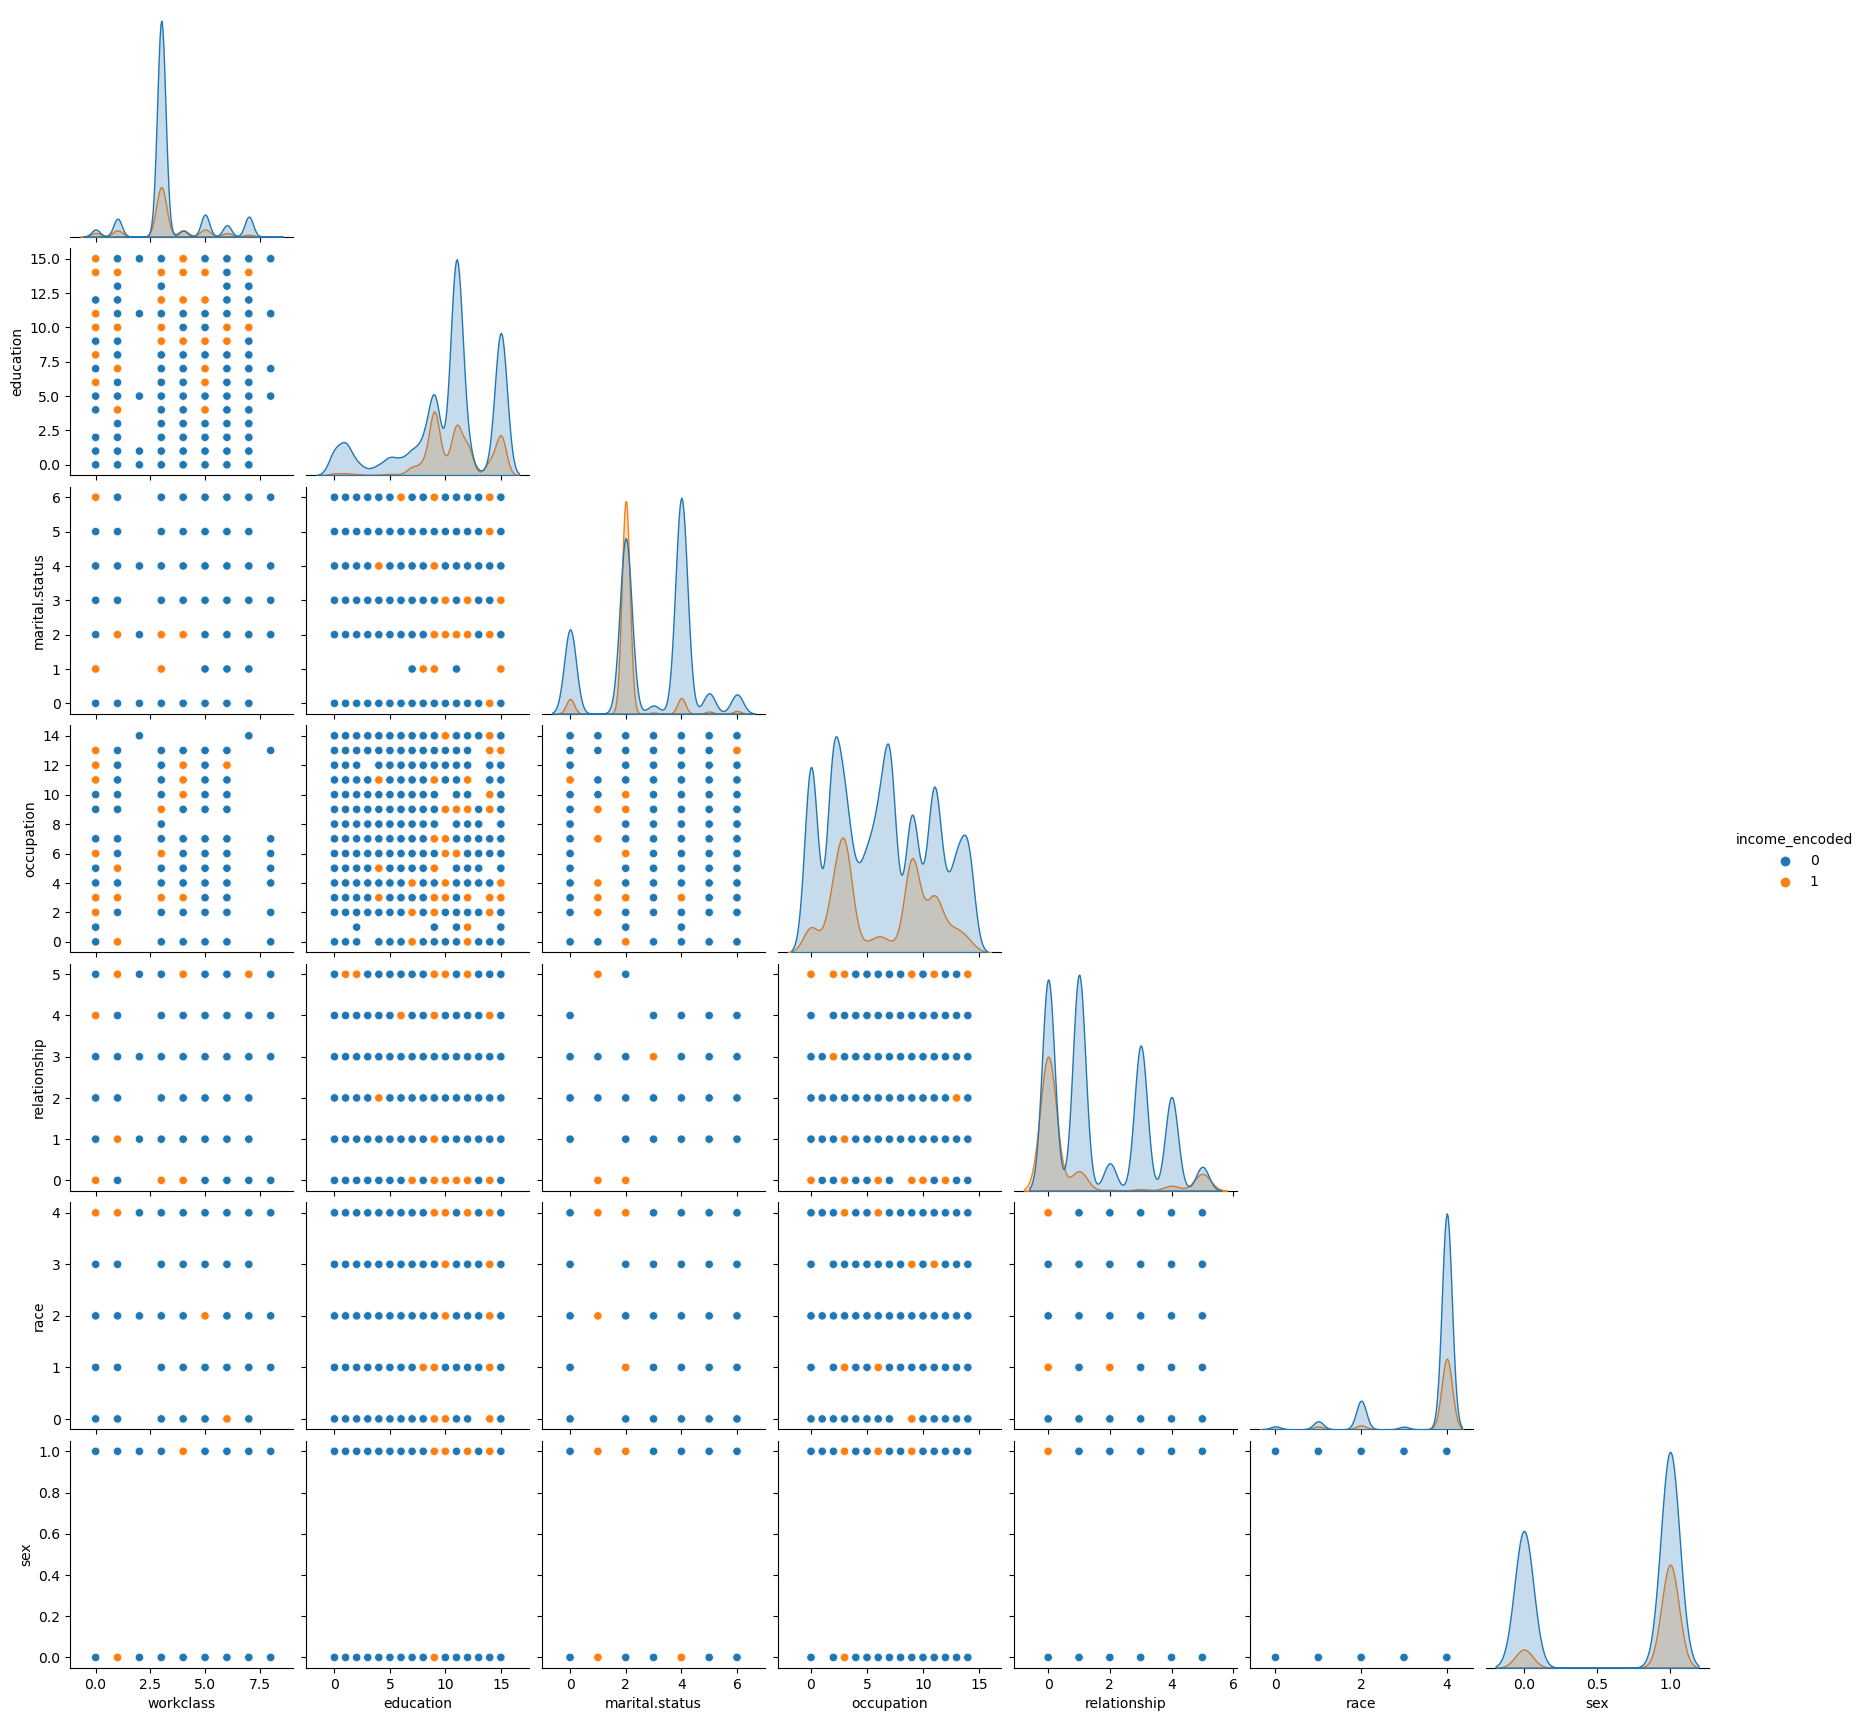

In [149]:
columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
columns.append('income_encoded')

sns.pairplot(df[columns], hue= "income_encoded", corner=True);



SyntaxError: invalid syntax (1951995059.py, line 1)